In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [2]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from PredictXANES import xanes_derivatives

Data import of 10,000 calculated average XANES spectra along with averaged coordination numbers, number of Cu atoms within 3 angstroms, and number of Te atoms within 3 angstroms.

In [3]:
df = pd.read_csv('mu_cn10000.csv')

In [4]:
df

,CN,Num Cu,Num Te,Mu1,Mu2,Mu3,Mu4,Mu5,Mu6,Mu7,...,Mu91,Mu92,Mu93,Mu94,Mu95,Mu96,Mu97,Mu98,Mu99,Mu100
0,9.920706,5.641016,4.279690,0.030303,0.032757,0.035112,0.037475,0.039958,0.042668,0.045714,...,0.994119,0.995957,0.998090,1.000540,1.003327,1.006472,1.009996,1.013918,1.018260,1.023043
1,9.038954,4.685766,4.353189,0.031529,0.034154,0.036671,0.039203,0.041875,0.044810,0.048132,...,0.999269,1.000942,1.002782,1.004773,1.006900,1.009148,1.011502,1.013947,1.016467,1.019047
2,9.725820,5.599930,4.125890,0.030576,0.033095,0.035505,0.037921,0.040456,0.043223,0.046335,...,0.994823,0.997591,1.000637,1.003974,1.007616,1.011577,1.015872,1.020514,1.025518,1.030897
3,9.374672,5.139779,4.234893,0.030891,0.033427,0.035861,0.038308,0.040883,0.043703,0.046883,...,0.999852,1.002114,1.004576,1.007246,1.010132,1.013241,1.016581,1.020158,1.023981,1.028057
4,9.599938,5.271755,4.328182,0.031077,0.033681,0.036170,0.038665,0.041287,0.044156,0.047393,...,0.998475,1.000035,1.001807,1.003776,1.005926,1.008242,1.010709,1.013311,1.016034,1.018861
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9.360022,5.084340,4.275681,0.030950,0.033483,0.035915,0.038363,0.040943,0.043770,0.046960,...,1.001789,1.003715,1.005820,1.008111,1.010590,1.013262,1.016131,1.019201,1.022478,1.025964
9996,9.758551,5.435938,4.322612,0.030927,0.033519,0.035994,0.038473,0.041074,0.043918,0.047124,...,1.000563,1.002288,1.004220,1.006344,1.008645,1.011110,1.013723,1.016471,1.019338,1.022312
9997,10.181228,6.181228,4.000000,0.030587,0.033143,0.035582,0.038020,0.040572,0.043356,0.046485,...,0.992527,0.996200,1.000256,1.004671,1.009423,1.014490,1.019850,1.025479,1.031355,1.037456
9998,10.156260,6.020380,4.135880,0.030699,0.033247,0.035682,0.038120,0.040676,0.043465,0.046604,...,0.994741,0.997739,1.001036,1.004613,1.008451,1.012532,1.016838,1.021350,1.026048,1.030916


## Spectra Only:

Neural network is trained on averaged spectra only. The spectra are split into a training set and testing set with a ratio of 4:1. The predicted features are the coordination number, number of Cu atoms, and number of Te atoms.

In [22]:
X = df.drop(labels=['CN', 'Num Cu', 'Num Te'], axis=1)
list = X.columns.tolist()

X.columns = range(X.shape[1])


noise = np.random.normal(0,0.015,[10000,100])
X_noise = X + noise
X_noise.columns = list

y = df[['CN', 'Num Cu', 'Num Te']]
X_train, X_test, y_train, y_test = train_test_split(X_noise, y, test_size=0.20, random_state=519)

One layer is added, and the depth of the that layer is optimized by looking at the loss from a range of 1 to 100, the maximum number of features being trained on.

In [24]:
loss = []
for i in range(100):
    if i == 0:
        pass
    else:
        nn = MLPRegressor(hidden_layer_sizes=(i), activation='identity', solver='adam', max_iter=500, random_state=28)
        nn = nn.fit(X_train, y_train)
        loss.append(nn.loss_)

lossdf = pd.DataFrame(loss)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(lossdf)

           0
0   0.098874
1   0.098120
2   0.041766
3   0.100560
4   0.103450
5   0.043923
6   0.099870
7   0.042669
8   0.038885
9   0.042602
10  0.041840
11  0.043740
12  0.041761
13  0.042045
14  0.043809
15  0.039231
16  0.039339
17  0.045207
18  0.042222
19  0.043696
20  0.045400
21  0.040829
22  0.043268
23  0.045516
24  0.039066
25  0.040540
26  0.040270
27  0.042203
28  0.040556
29  0.036290
30  0.042539
31  0.034814
32  0.039502
33  0.038171
34  0.043683
35  0.039807
36  0.042454
37  0.040814
38  0.039230
39  0.041534
40  0.037715
41  0.039044
42  0.043946
43  0.045092
44  0.042563
45  0.040127
46  0.041234
47  0.040064
48  0.037998
49  0.035612
50  0.041120
51  0.040937
52  0.042891
53  0.034253
54  0.039956
55  0.040901
56  0.038785
57  0.040383
58  0.046725
59  0.034938
60  0.036701
61  0.040564
62  0.042370
63  0.039696
64  0.044762
65  0.042815
66  0.041283
67  0.040700
68  0.043149
69  0.039832
70  0.042301
71  0.041119
72  0.033850
73  0.036275
74  0.039025
75  0.039161

In [8]:
min_loss = lossdf.idxmin()[0]+1
print(min_loss)
nn = MLPRegressor(hidden_layer_sizes=(min_loss), activation='identity', solver='adam', max_iter=500, random_state=28)
nn = nn.fit(X_train, y_train)
loss = nn.loss_
print(loss)


66
0.03431366762420192


In [9]:
y_train_pred = nn.predict(X_train)
y_test_pred = nn.predict(X_test)
train_score_CN = r2_score(y_train.iloc[:,0], y_train_pred[:,0])
train_score_Cu = r2_score(y_train.iloc[:,1], y_train_pred[:,1]) 
train_score_Te = r2_score(y_train.iloc[:,2], y_train_pred[:,2])
test_score_CN = r2_score(y_test.iloc[:,0], y_test_pred[:,0])
test_score_Cu = r2_score(y_test.iloc[:,1], y_test_pred[:,1])
test_score_Te = r2_score(y_test.iloc[:,2], y_test_pred[:,2])
train_mse_CN = mean_squared_error(y_train.iloc[:,0], y_train_pred[:,0])
train_mse_Cu = mean_squared_error(y_train.iloc[:,1], y_train_pred[:,1])
train_mse_Te = mean_squared_error(y_train.iloc[:,2], y_train_pred[:,2])
test_mse_CN = mean_squared_error(y_test.iloc[:,0], y_test_pred[:,0])
test_mse_Cu = mean_squared_error(y_test.iloc[:,1], y_test_pred[:,1])
test_mse_Te = mean_squared_error(y_test.iloc[:,2], y_test_pred[:,2])

train_score_list = [train_score_CN, train_score_Cu, train_score_Te]
train_mse_list = [train_mse_CN, train_mse_Cu, train_mse_Te]
test_mse_list = [test_mse_CN, train_mse_Cu, train_mse_Te]
test_score_list = [test_score_CN, test_score_Cu, test_score_Te]
print('training mse =  '+ str(train_mse_list))
print('testing mse = ' + str(test_mse_list))
print('training R2 = ' + str(train_score_list))
print('testing R2 = ' + str(test_score_list))

training mse =  [0.09447495323940505, 0.1008523297776, 0.0032815157545990066]
testing mse = [0.10074197270159004, 0.1008523297776, 0.0032815157545990066]
training R2 = [0.49879057571352237, 0.6967260934122946, 0.9360408085091235]
testing R2 = [0.5058022318021058, 0.6941676977202087, 0.9366795796142807]


(3.93479262672811, 5.065207373271892, 3.7835802208837097, 5.20233363750826)

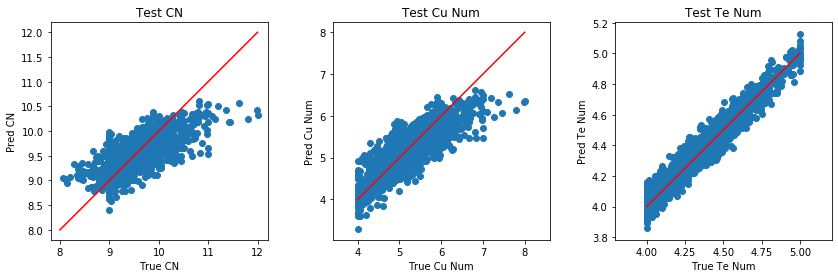

In [10]:
x1 = np.linspace(8, 12, 50)
x2 = np.linspace(4, 8, 50)
x3 = np.linspace(4, 5, 50)

plt.figure(figsize=[14,4])
plt.subplots_adjust(wspace=0.3)
ax1 = plt.subplot(1,3,1)
ax1.scatter(y_test.iloc[:,0], y_test_pred[:,0])
ax1.plot(x1, x1, color='red')
ax1.set_xlabel('True CN')
ax1.set_ylabel('Pred CN')
ax1.set_title('Test CN')
plt.axis('equal')

ax2 = plt.subplot(1,3,2)
ax2.scatter(y_test.iloc[:,1], y_test_pred[:,1])
ax2.plot(x2, x2, color='red')
ax2.set_xlabel('True Cu Num')
ax2.set_ylabel('Pred Cu Num')
ax2.set_title('Test Cu Num')
plt.axis('equal')


ax3 = plt.subplot(1,3,3)
ax3.scatter(y_test.iloc[:,2], y_test_pred[:,2])
ax3.plot(x3, x3, color='red')
ax3.set_xlabel('True Te Num')
ax3.set_ylabel('Pred Te Num')
ax3.set_title('Test Te Num')
plt.axis('equal')


# Repeated for training with both the first and second derivative.

In [25]:
d1, d2 = xanes_derivatives.xanes_derivatives(X_noise)
df1 = pd.DataFrame(d1)
df2 = pd.DataFrame(d2)
df3 = pd.concat([df1, df2], axis=1)
X_train, X_test, y_train, y_test = train_test_split(df3, y)

In [26]:
loss = []
for i in range(200):
    if i == 0:
        pass
    else:
        nn = MLPRegressor(hidden_layer_sizes=(i), activation='identity', solver='adam', max_iter=500, random_state=28)
        nn = nn.fit(X_train, y_train)
        loss.append(nn.loss_)

lossdf10 = pd.DataFrame(loss)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(lossdf10)

            0
0    0.042187
1    0.034738
2    0.033671
3    0.034038
4    0.034577
5    0.035418
6    0.033578
7    0.033656
8    0.034514
9    0.033769
10   0.034242
11   0.033659
12   0.033836
13   0.033381
14   0.034097
15   0.032854
16   0.033830
17   0.033463
18   0.033489
19   0.033060
20   0.033295
21   0.033931
22   0.033117
23   0.033985
24   0.032949
25   0.033306
26   0.032971
27   0.032477
28   0.033369
29   0.032874
30   0.033266
31   0.033152
32   0.033005
33   0.033829
34   0.032829
35   0.033423
36   0.032984
37   0.033511
38   0.033703
39   0.033083
40   0.033361
41   0.032666
42   0.033221
43   0.032676
44   0.033377
45   0.032766
46   0.033321
47   0.032750
48   0.033255
49   0.033535
50   0.032405
51   0.032983
52   0.033087
53   0.033364
54   0.032681
55   0.032880
56   0.032968
57   0.032986
58   0.033584
59   0.032590
60   0.033105
61   0.032506
62   0.032002
63   0.033492
64   0.033430
65   0.032285
66   0.032497
67   0.033090
68   0.032496
69   0.032926
70   0

In [30]:
min_loss10 = lossdf10.idxmin()[0]+1
print(min_loss10)
nn = MLPRegressor(hidden_layer_sizes=(min_loss10), activation='identity', solver='adam', max_iter=500, random_state=28)
nn = nn.fit(X_train, y_train)
loss = nn.loss_
print(loss)

63
0.03200152539416751


In [31]:
y_train_pred = nn.predict(X_train)
y_test_pred = nn.predict(X_test)
train_score_CN = r2_score(y_train.iloc[:,0], y_train_pred[:,0])
train_score_Cu = r2_score(y_train.iloc[:,1], y_train_pred[:,1]) 
train_score_Te = r2_score(y_train.iloc[:,2], y_train_pred[:,2])
test_score_CN = r2_score(y_test.iloc[:,0], y_test_pred[:,0])
test_score_Cu = r2_score(y_test.iloc[:,1], y_test_pred[:,1])
test_score_Te = r2_score(y_test.iloc[:,2], y_test_pred[:,2])
train_mse_CN = mean_squared_error(y_train.iloc[:,0], y_train_pred[:,0])
train_mse_Cu = mean_squared_error(y_train.iloc[:,1], y_train_pred[:,1])
train_mse_Te = mean_squared_error(y_train.iloc[:,2], y_train_pred[:,2])
test_mse_CN = mean_squared_error(y_test.iloc[:,0], y_test_pred[:,0])
test_mse_Cu = mean_squared_error(y_test.iloc[:,1], y_test_pred[:,1])
test_mse_Te = mean_squared_error(y_test.iloc[:,2], y_test_pred[:,2])

train_score_list = [train_score_CN, train_score_Cu, train_score_Te]
train_mse_list = [train_mse_CN, train_mse_Cu, train_mse_Te]
test_mse_list = [test_mse_CN, train_mse_Cu, train_mse_Te]
test_score_list = [test_score_CN, test_score_Cu, test_score_Te]
print('training mse =  '+ str(train_mse_list))
print('testing mse = ' + str(test_mse_list))
print('training R2 = ' + str(train_score_list))
print('testing R2 = ' + str(test_score_list))

training mse =  [0.08916370387568007, 0.09595771567770765, 0.003912609340819304]
testing mse = [0.09248294999939238, 0.09595771567770765, 0.003912609340819304]
training R2 = [0.5337826773540288, 0.7153907785347513, 0.9249310172623538]
testing R2 = [0.5196014964270791, 0.7038476626136739, 0.9223175496783004]


(3.93479262672811, 5.06520737327189, 3.8260538173858247, 5.212661899668443)

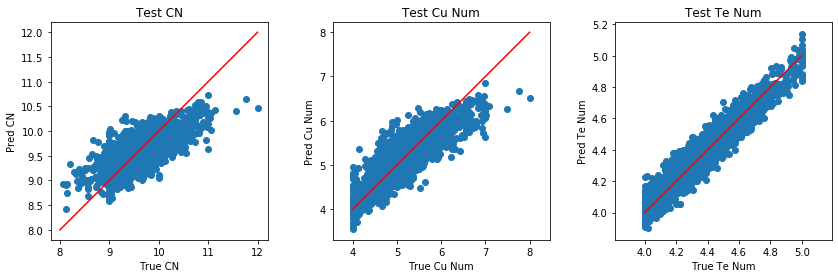

In [32]:
x1 = np.linspace(8, 12, 50)
x2 = np.linspace(4, 8, 50)
x3 = np.linspace(4, 5, 50)

plt.figure(figsize=[14,4])
plt.subplots_adjust(wspace=0.3)
ax1 = plt.subplot(1,3,1)
ax1.scatter(y_test.iloc[:,0], y_test_pred[:,0])
ax1.plot(x1, x1, color='red')
ax1.set_xlabel('True CN')
ax1.set_ylabel('Pred CN')
ax1.set_title('Test CN')
plt.axis('equal')

ax2 = plt.subplot(1,3,2)
ax2.scatter(y_test.iloc[:,1], y_test_pred[:,1])
ax2.plot(x2, x2, color='red')
ax2.set_xlabel('True Cu Num')
ax2.set_ylabel('Pred Cu Num')
ax2.set_title('Test Cu Num')
plt.axis('equal')


ax3 = plt.subplot(1,3,3)
ax3.scatter(y_test.iloc[:,2], y_test_pred[:,2])
ax3.plot(x3, x3, color='red')
ax3.set_xlabel('True Te Num')
ax3.set_ylabel('Pred Te Num')
ax3.set_title('Test Te Num')
plt.axis('equal')


In [33]:
loss = []
for i in range(200):
    if i == 0:
        pass
    else:
        nn = MLPRegressor(hidden_layer_sizes=(min_loss10, i), activation='identity', solver='adam', max_iter=500, random_state=28)
        nn = nn.fit(X_train, y_train)
        loss.append(nn.loss_)

lossdf11 = pd.DataFrame(loss)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(lossdf11)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


            0
0    0.043915
1    0.032616
2    0.032867
3    0.032783
4    0.032153
5    0.032651
6    0.032860
7    0.032220
8    0.033090
9    0.032305
10   0.032305
11   0.032411
12   0.032242
13   0.032528
14   0.032270
15   0.032269
16   0.032600
17   0.033152
18   0.032784
19   0.032186
20   0.032141
21   0.032657
22   0.032382
23   0.032533
24   0.032256
25   0.032530
26   0.032243
27   0.032448
28   0.032764
29   0.032261
30   0.033207
31   0.032620
32   0.032209
33   0.032127
34   0.032491
35   0.032582
36   0.032333
37   0.032186
38   0.032288
39   0.032747
40   0.032520
41   0.032365
42   0.032199
43   0.032245
44   0.032341
45   0.032778
46   0.032360
47   0.032150
48   0.033047
49   0.032163
50   0.032584
51   0.033079
52   0.032802
53   0.032382
54   0.032552
55   0.032856
56   0.032411
57   0.032459
58   0.032788
59   0.032378
60   0.032075
61   0.032337
62   0.032598
63   0.032042
64   0.032040
65   0.032282
66   0.032317
67   0.032257
68   0.032235
69   0.031902
70   0

In [34]:
min_loss11 = lossdf11.idxmin()[0]+1
print(min_loss11)
nn = MLPRegressor(hidden_layer_sizes=(min_loss10, min_loss11), activation='identity', solver='adam', max_iter=500, random_state=28)
nn = nn.fit(X_train, y_train)
loss = nn.loss_
print(loss)

137
0.03184841707228273


In [35]:
y_train_pred = nn.predict(X_train)
y_test_pred = nn.predict(X_test)
train_score_CN = r2_score(y_train.iloc[:,0], y_train_pred[:,0])
train_score_Cu = r2_score(y_train.iloc[:,1], y_train_pred[:,1]) 
train_score_Te = r2_score(y_train.iloc[:,2], y_train_pred[:,2])
test_score_CN = r2_score(y_test.iloc[:,0], y_test_pred[:,0])
test_score_Cu = r2_score(y_test.iloc[:,1], y_test_pred[:,1])
test_score_Te = r2_score(y_test.iloc[:,2], y_test_pred[:,2])
train_mse_CN = mean_squared_error(y_train.iloc[:,0], y_train_pred[:,0])
train_mse_Cu = mean_squared_error(y_train.iloc[:,1], y_train_pred[:,1])
train_mse_Te = mean_squared_error(y_train.iloc[:,2], y_train_pred[:,2])
test_mse_CN = mean_squared_error(y_test.iloc[:,0], y_test_pred[:,0])
test_mse_Cu = mean_squared_error(y_test.iloc[:,1], y_test_pred[:,1])
test_mse_Te = mean_squared_error(y_test.iloc[:,2], y_test_pred[:,2])

train_score_list = [train_score_CN, train_score_Cu, train_score_Te]
train_mse_list = [train_mse_CN, train_mse_Cu, train_mse_Te]
test_mse_list = [test_mse_CN, train_mse_Cu, train_mse_Te]
test_score_list = [test_score_CN, test_score_Cu, test_score_Te]
print('training mse =  '+ str(train_mse_list))
print('testing mse = ' + str(test_mse_list))
print('training R2 = ' + str(train_score_list))
print('testing R2 = ' + str(test_score_list))

training mse =  [0.08870068671612258, 0.09541239090444337, 0.003941182105535231]
testing mse = [0.0922748349087113, 0.09541239090444337, 0.003941182105535231]
training R2 = [0.5362036918597635, 0.7170082040650312, 0.9243828080765174]
testing R2 = [0.5206825408588884, 0.7060463803402383, 0.9234526812604255]


(3.93479262672811, 5.06520737327189, 3.8106597059431233, 5.168409487873568)

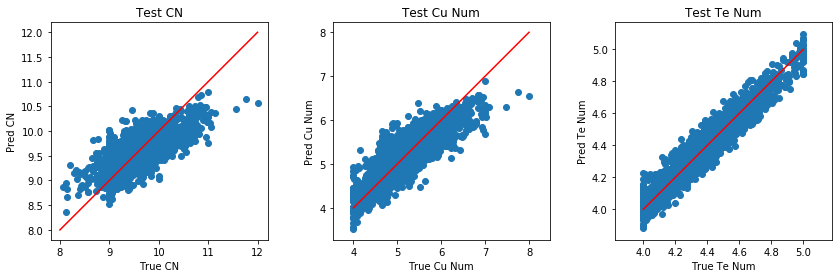

In [36]:
x1 = np.linspace(8, 12, 50)
x2 = np.linspace(4, 8, 50)
x3 = np.linspace(4, 5, 50)

plt.figure(figsize=[14,4])
plt.subplots_adjust(wspace=0.3)
ax1 = plt.subplot(1,3,1)
ax1.scatter(y_test.iloc[:,0], y_test_pred[:,0])
ax1.plot(x1, x1, color='red')
ax1.set_xlabel('True CN')
ax1.set_ylabel('Pred CN')
ax1.set_title('Test CN')
plt.axis('equal')

ax2 = plt.subplot(1,3,2)
ax2.scatter(y_test.iloc[:,1], y_test_pred[:,1])
ax2.plot(x2, x2, color='red')
ax2.set_xlabel('True Cu Num')
ax2.set_ylabel('Pred Cu Num')
ax2.set_title('Test Cu Num')
plt.axis('equal')


ax3 = plt.subplot(1,3,3)
ax3.scatter(y_test.iloc[:,2], y_test_pred[:,2])
ax3.plot(x3, x3, color='red')
ax3.set_xlabel('True Te Num')
ax3.set_ylabel('Pred Te Num')
ax3.set_title('Test Te Num')
plt.axis('equal')


In [37]:
loss = []
for i in range(200):
    if i == 0:
        pass
    else:
        nn = MLPRegressor(hidden_layer_sizes=(min_loss10, min_loss11, i), activation='identity', solver='adam', max_iter=500, random_state=28)
        nn = nn.fit(X_train, y_train)
        loss.append(nn.loss_)

lossdf12 = pd.DataFrame(loss)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(lossdf12)

            0
0    0.075091
1    0.033409
2    0.032059
3    0.033101
4    0.032274
5    0.032570
6    0.032063
7    0.032385
8    0.032270
9    0.032616
10   0.032340
11   0.031713
12   0.032810
13   0.032574
14   0.032474
15   0.032241
16   0.032275
17   0.032494
18   0.032551
19   0.032930
20   0.032120
21   0.032849
22   0.032644
23   0.033315
24   0.032141
25   0.033550
26   0.031941
27   0.032290
28   0.032545
29   0.033101
30   0.032254
31   0.032833
32   0.032302
33   0.032668
34   0.032814
35   0.032614
36   0.033079
37   0.032796
38   0.032572
39   0.032327
40   0.032451
41   0.032400
42   0.032076
43   0.032254
44   0.032059
45   0.032485
46   0.032472
47   0.033143
48   0.033661
49   0.032439
50   0.032743
51   0.033106
52   0.032274
53   0.032333
54   0.032282
55   0.032404
56   0.032043
57   0.032008
58   0.032591
59   0.032155
60   0.032130
61   0.032827
62   0.032289
63   0.032145
64   0.032695
65   0.032739
66   0.033209
67   0.032732
68   0.032212
69   0.031785
70   0

In [38]:
min_loss12 = lossdf12.idxmin()[0]+1
print(min_loss12)
nn = MLPRegressor(hidden_layer_sizes=(min_loss10, min_loss11, min_loss12), activation='identity', solver='adam', max_iter=500, random_state=28)
nn = nn.fit(X_train, y_train)
loss = nn.loss_
print(loss)

12
0.03171325919165019


In [39]:
y_train_pred = nn.predict(X_train)
y_test_pred = nn.predict(X_test)
train_score_CN = r2_score(y_train.iloc[:,0], y_train_pred[:,0])
train_score_Cu = r2_score(y_train.iloc[:,1], y_train_pred[:,1]) 
train_score_Te = r2_score(y_train.iloc[:,2], y_train_pred[:,2])
test_score_CN = r2_score(y_test.iloc[:,0], y_test_pred[:,0])
test_score_Cu = r2_score(y_test.iloc[:,1], y_test_pred[:,1])
test_score_Te = r2_score(y_test.iloc[:,2], y_test_pred[:,2])
train_mse_CN = mean_squared_error(y_train.iloc[:,0], y_train_pred[:,0])
train_mse_Cu = mean_squared_error(y_train.iloc[:,1], y_train_pred[:,1])
train_mse_Te = mean_squared_error(y_train.iloc[:,2], y_train_pred[:,2])
test_mse_CN = mean_squared_error(y_test.iloc[:,0], y_test_pred[:,0])
test_mse_Cu = mean_squared_error(y_test.iloc[:,1], y_test_pred[:,1])
test_mse_Te = mean_squared_error(y_test.iloc[:,2], y_test_pred[:,2])

train_score_list = [train_score_CN, train_score_Cu, train_score_Te]
train_mse_list = [train_mse_CN, train_mse_Cu, train_mse_Te]
test_mse_list = [test_mse_CN, train_mse_Cu, train_mse_Te]
test_score_list = [test_score_CN, test_score_Cu, test_score_Te]
print('training mse =  '+ str(train_mse_list))
print('testing mse = ' + str(test_mse_list))
print('training R2 = ' + str(train_score_list))
print('testing R2 = ' + str(test_score_list))

training mse =  [0.0881217672669846, 0.09592430759836683, 0.004198284471256488]
testing mse = [0.09116704409425569, 0.09592430759836683, 0.004198284471256488]
training R2 = [0.539230733849642, 0.7154898664234604, 0.9194499330120992]
testing R2 = [0.5264369101727975, 0.7048682756140391, 0.9133408900862297]


(3.93479262672811, 5.06520737327189, 3.7354692792136834, 5.163056365527174)

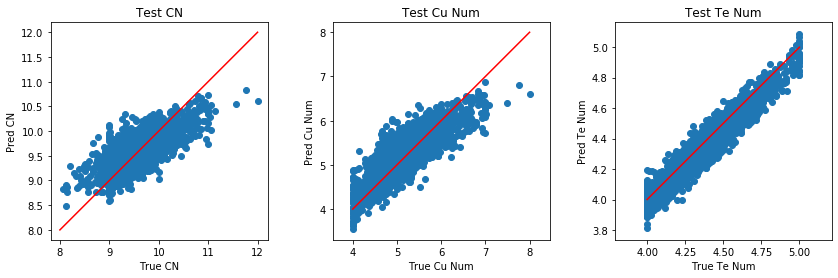

In [40]:
x1 = np.linspace(8, 12, 50)
x2 = np.linspace(4, 8, 50)
x3 = np.linspace(4, 5, 50)

plt.figure(figsize=[14,4])
plt.subplots_adjust(wspace=0.3)
ax1 = plt.subplot(1,3,1)
ax1.scatter(y_test.iloc[:,0], y_test_pred[:,0])
ax1.plot(x1, x1, color='red')
ax1.set_xlabel('True CN')
ax1.set_ylabel('Pred CN')
ax1.set_title('Test CN')
plt.axis('equal')

ax2 = plt.subplot(1,3,2)
ax2.scatter(y_test.iloc[:,1], y_test_pred[:,1])
ax2.plot(x2, x2, color='red')
ax2.set_xlabel('True Cu Num')
ax2.set_ylabel('Pred Cu Num')
ax2.set_title('Test Cu Num')
plt.axis('equal')


ax3 = plt.subplot(1,3,3)
ax3.scatter(y_test.iloc[:,2], y_test_pred[:,2])
ax3.plot(x3, x3, color='red')
ax3.set_xlabel('True Te Num')
ax3.set_ylabel('Pred Te Num')
ax3.set_title('Test Te Num')
plt.axis('equal')


In [41]:
loss = []
for i in range(200):
    if i == 0:
        pass
    else:
        nn = MLPRegressor(hidden_layer_sizes=(min_loss10, min_loss11, min_loss12, i), activation='identity', solver='adam', max_iter=500, random_state=28)
        nn = nn.fit(X_train, y_train)
        loss.append(nn.loss_)

lossdf13 = pd.DataFrame(loss)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(lossdf13)

            0
0    0.075972
1    0.031668
2    0.032415
3    0.032710
4    0.032182
5    0.032321
6    0.032494
7    0.031933
8    0.032520
9    0.032316
10   0.032901
11   0.032366
12   0.032714
13   0.032881
14   0.032250
15   0.032189
16   0.032402
17   0.032095
18   0.032308
19   0.032343
20   0.032399
21   0.032847
22   0.033156
23   0.032735
24   0.033474
25   0.032437
26   0.032405
27   0.032244
28   0.033243
29   0.032132
30   0.032969
31   0.032085
32   0.032593
33   0.032011
34   0.032464
35   0.032402
36   0.033675
37   0.032658
38   0.032473
39   0.032252
40   0.032875
41   0.033895
42   0.032065
43   0.032823
44   0.032348
45   0.032447
46   0.032371
47   0.032432
48   0.032357
49   0.033179
50   0.031969
51   0.032409
52   0.032027
53   0.032608
54   0.035864
55   0.031862
56   0.033327
57   0.032676
58   0.032923
59   0.032437
60   0.032406
61   0.032035
62   0.032508
63   0.032683
64   0.032762
65   0.032114
66   0.032464
67   0.031958
68   0.032728
69   0.032594
70   0

In [42]:
min_loss13 = lossdf13.idxmin()[0]+1
print(min_loss13)
nn = MLPRegressor(hidden_layer_sizes=(min_loss10, min_loss11, min_loss12), activation='identity', solver='adam', max_iter=500, random_state=28)
nn = nn.fit(X_train, y_train)
loss = nn.loss_
print(loss)

2
0.03171325919165019


In [43]:
y_train_pred = nn.predict(X_train)
y_test_pred = nn.predict(X_test)
train_score_CN = r2_score(y_train.iloc[:,0], y_train_pred[:,0])
train_score_Cu = r2_score(y_train.iloc[:,1], y_train_pred[:,1]) 
train_score_Te = r2_score(y_train.iloc[:,2], y_train_pred[:,2])
test_score_CN = r2_score(y_test.iloc[:,0], y_test_pred[:,0])
test_score_Cu = r2_score(y_test.iloc[:,1], y_test_pred[:,1])
test_score_Te = r2_score(y_test.iloc[:,2], y_test_pred[:,2])
train_mse_CN = mean_squared_error(y_train.iloc[:,0], y_train_pred[:,0])
train_mse_Cu = mean_squared_error(y_train.iloc[:,1], y_train_pred[:,1])
train_mse_Te = mean_squared_error(y_train.iloc[:,2], y_train_pred[:,2])
test_mse_CN = mean_squared_error(y_test.iloc[:,0], y_test_pred[:,0])
test_mse_Cu = mean_squared_error(y_test.iloc[:,1], y_test_pred[:,1])
test_mse_Te = mean_squared_error(y_test.iloc[:,2], y_test_pred[:,2])

train_score_list = [train_score_CN, train_score_Cu, train_score_Te]
train_mse_list = [train_mse_CN, train_mse_Cu, train_mse_Te]
test_mse_list = [test_mse_CN, train_mse_Cu, train_mse_Te]
test_score_list = [test_score_CN, test_score_Cu, test_score_Te]
print('training mse =  '+ str(train_mse_list))
print('testing mse = ' + str(test_mse_list))
print('training R2 = ' + str(train_score_list))
print('testing R2 = ' + str(test_score_list))

training mse =  [0.0881217672669846, 0.09592430759836683, 0.004198284471256488]
testing mse = [0.09116704409425569, 0.09592430759836683, 0.004198284471256488]
training R2 = [0.539230733849642, 0.7154898664234604, 0.9194499330120992]
testing R2 = [0.5264369101727975, 0.7048682756140391, 0.9133408900862297]


(3.93479262672811, 5.06520737327189, 3.7354692792136834, 5.163056365527174)

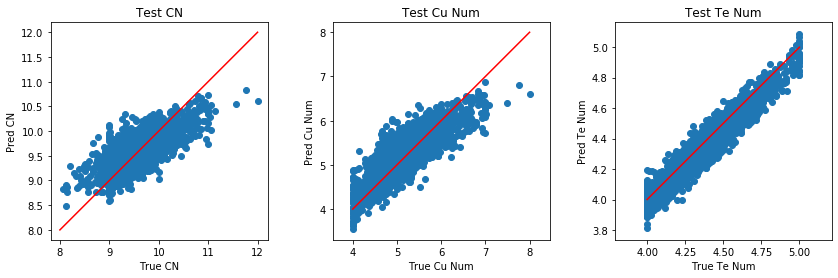

In [44]:
x1 = np.linspace(8, 12, 50)
x2 = np.linspace(4, 8, 50)
x3 = np.linspace(4, 5, 50)

plt.figure(figsize=[14,4])
plt.subplots_adjust(wspace=0.3)
ax1 = plt.subplot(1,3,1)
ax1.scatter(y_test.iloc[:,0], y_test_pred[:,0])
ax1.plot(x1, x1, color='red')
ax1.set_xlabel('True CN')
ax1.set_ylabel('Pred CN')
ax1.set_title('Test CN')
plt.axis('equal')

ax2 = plt.subplot(1,3,2)
ax2.scatter(y_test.iloc[:,1], y_test_pred[:,1])
ax2.plot(x2, x2, color='red')
ax2.set_xlabel('True Cu Num')
ax2.set_ylabel('Pred Cu Num')
ax2.set_title('Test Cu Num')
plt.axis('equal')


ax3 = plt.subplot(1,3,3)
ax3.scatter(y_test.iloc[:,2], y_test_pred[:,2])
ax3.plot(x3, x3, color='red')
ax3.set_xlabel('True Te Num')
ax3.set_ylabel('Pred Te Num')
ax3.set_title('Test Te Num')
plt.axis('equal')
